<a href="https://colab.research.google.com/github/skashish-23/Projects-made-using-Colab/blob/main/Electricity_Price_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xlsxwriter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
pip install mplcursors

In [ ]:
import pandas as pd
import numpy as np
import datetime # To measure execution time etc.
import pickle # To load files stored in the Pickle format
import matplotlib.pyplot as plt # For visualizing data
import missingno as msno # For dealing with missing values in the data
import io
import mplcursors
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf                                              #to plot autocorrelation between a time series and several lagged versions of itself
from statsmodels.tsa.stattools import acf                                                       #to calculate correlation of a series with a lagged version of itself using acf function
from statsmodels.tsa.seasonal import STL                                                        #to visualise the trend, seasonality, and noise in a time series
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf                                             #to plot partial autocorrelation between a series and different lagged versions of itself
from scipy.stats import spearmanr
import xgboost as xgb
import random
from sklearn.metrics import mean_squared_error
from statistics import mean

In [ ]:
from google.colab import drive                                                                  #this is done so that excel sheets can be directly accessed from My Google Drive.
drive.mount('/content/drive')                                                                   # the necessary excel files must be present in Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Day_ahead_price_2015_23.xlsx")


In [ ]:
df["Date-Time"] = pd.to_datetime(df["Date"]+ " " + df["Start"])               #date and time are converted to datetime format.
df['Date-Time'] = df['Date-Time'].values
df = df.drop(columns = "Start")
df = df.drop(columns = "End")
df = df.drop(columns = "Date")

In [ ]:
df.index = pd.to_datetime(df.index, errors='coerce')
df = df.set_index("Date-Time")
df.index = pd.to_datetime(df.index)

In [ ]:
df = df.rename(columns = {"DE/AT/LU [€/MWh]" : "Price"})

In [ ]:
# Extract year from timestamp
df['year'] = df["Date-Time"].dt.year

# Group data by year
grouped_data = df.groupby('year')

#  Calculate average price for each year
average_prices = grouped_data['Price'].mean()

# Display the average prices for each year
print(average_prices)

year
2015     31.834931
2016     28.982497
2017     34.188527
2018     44.468920
2019     37.666600
2020     30.470715
2021     96.849918
2022    235.446143
2023     95.175452
Name: Price, dtype: float64


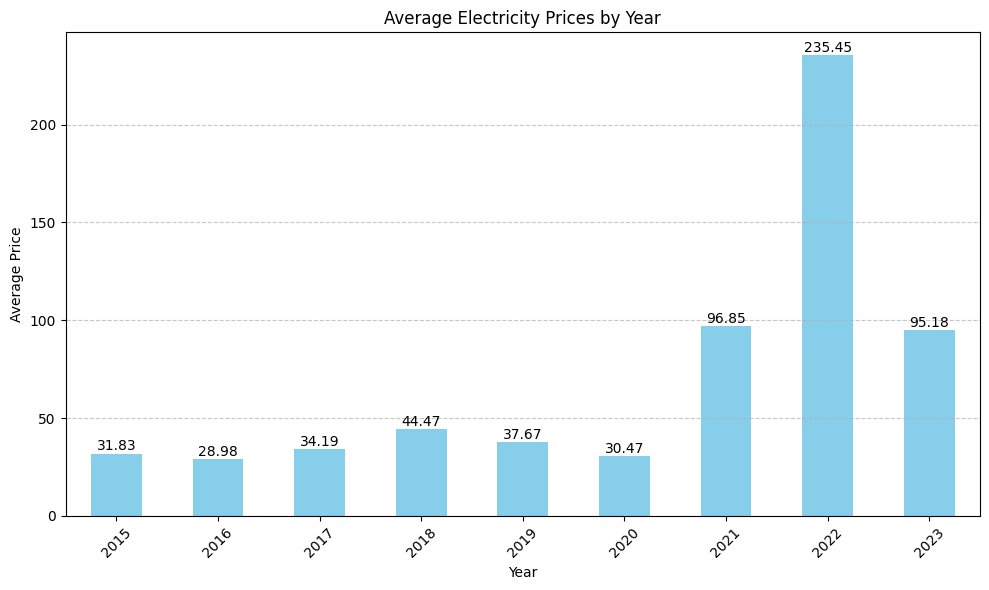

In [ ]:
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Electricity Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of each bar
for i, v in enumerate(average_prices):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

Price
Date-Time                 
2015-01-05 00:00:00  22.34
2015-01-05 01:00:00  17.93
2015-01-05 02:00:00  15.17
2015-01-05 03:00:00  16.38
2015-01-05 04:00:00  17.38

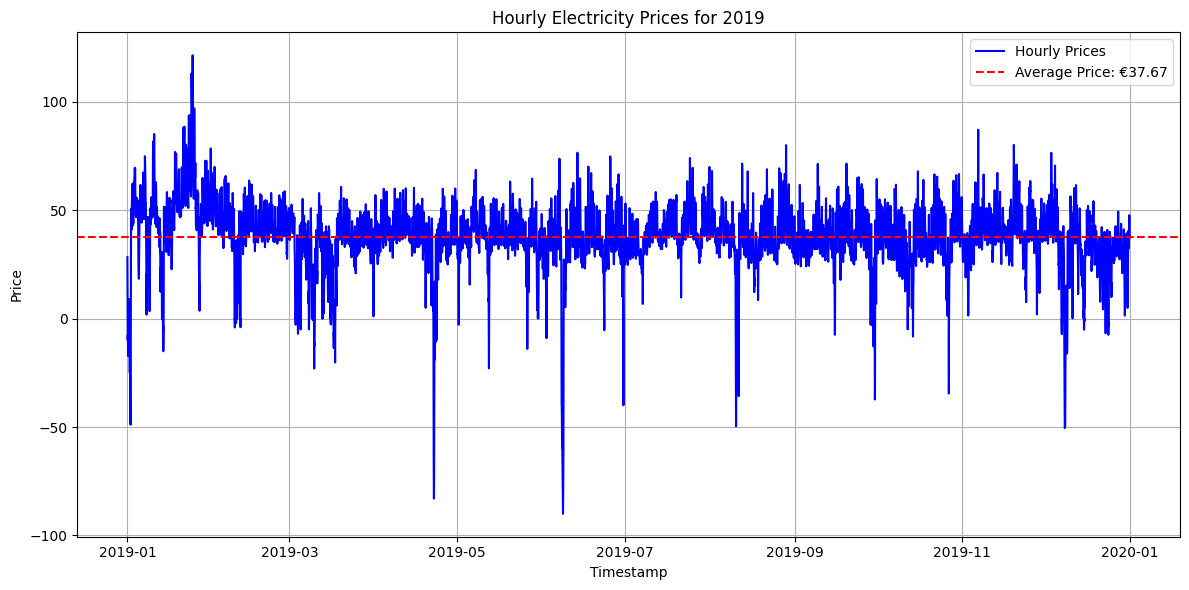

In [ ]:
data_2019 = df[df['year'] == 2019]

# Step 2: Calculate average price for 2019
average_price_2019 = data_2019['Price'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot hourly electricity prices for 2019
plt.plot(data_2019['Date-Time'], data_2019['Price'], color='blue', label='Hourly Prices')

# Add a horizontal line for the average price
plt.axhline(y=average_price_2019, color='red', linestyle='--', label=f'Average Price: €{average_price_2019:.2f}')

plt.title('Hourly Electricity Prices for 2019')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

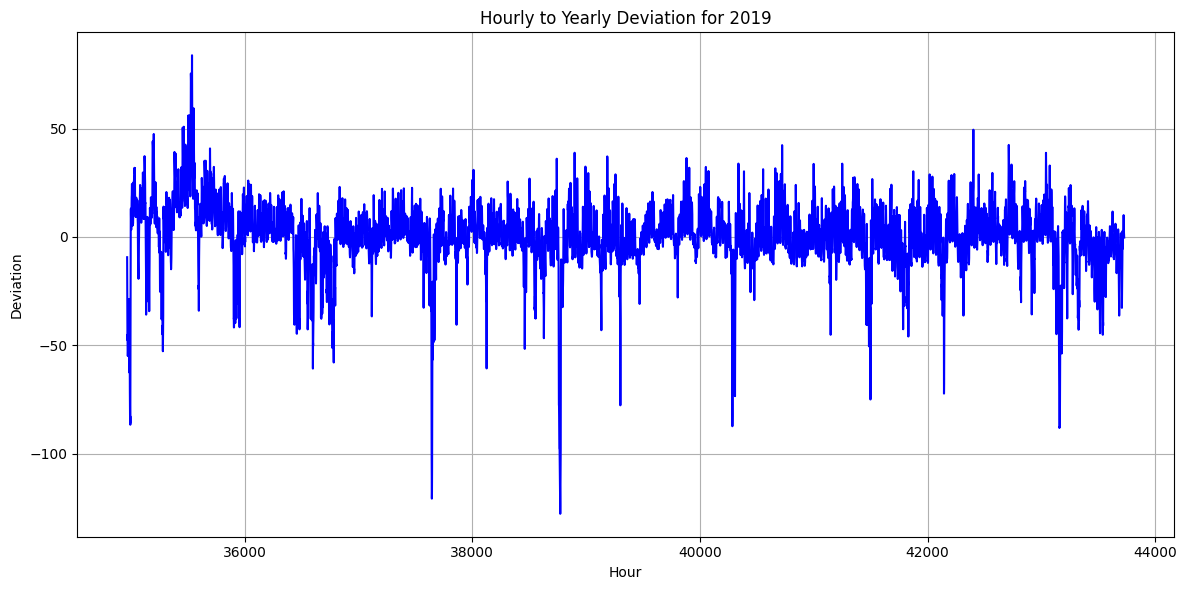

In [ ]:
data_2019 = df[df['year'] == 2019]

# Step 2: Calculate the average price for each hour of the day in 2019
hourly_average_prices_2019 = data_2019.groupby(data_2019['Date-Time'].dt.hour)['Price'].mean()

# Step 3: Calculate the yearly average price for 2019
yearly_average_price_2019 = data_2019['Price'].mean()

# Step 4: Calculate the deviation for each hour in 2019
deviation_per_hour_2019 = data_2019['Price'] - yearly_average_price_2019

# Plotting
plt.figure(figsize=(12, 6))

# Plot the deviation values for 2019
plt.plot(deviation_per_hour_2019.index, deviation_per_hour_2019.values, color='blue')

plt.title('Hourly to Yearly Deviation for 2019')
plt.xlabel('Hour')
plt.ylabel('Deviation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data_2019.head()

Price           Date-Time  year
34968  28.32 2019-01-01 00:00:00  2019
34969  10.07 2019-01-01 01:00:00  2019
34970  -4.08 2019-01-01 02:00:00  2019
34971  -9.91 2019-01-01 03:00:00  2019
34972  -7.41 2019-01-01 04:00:00  2019

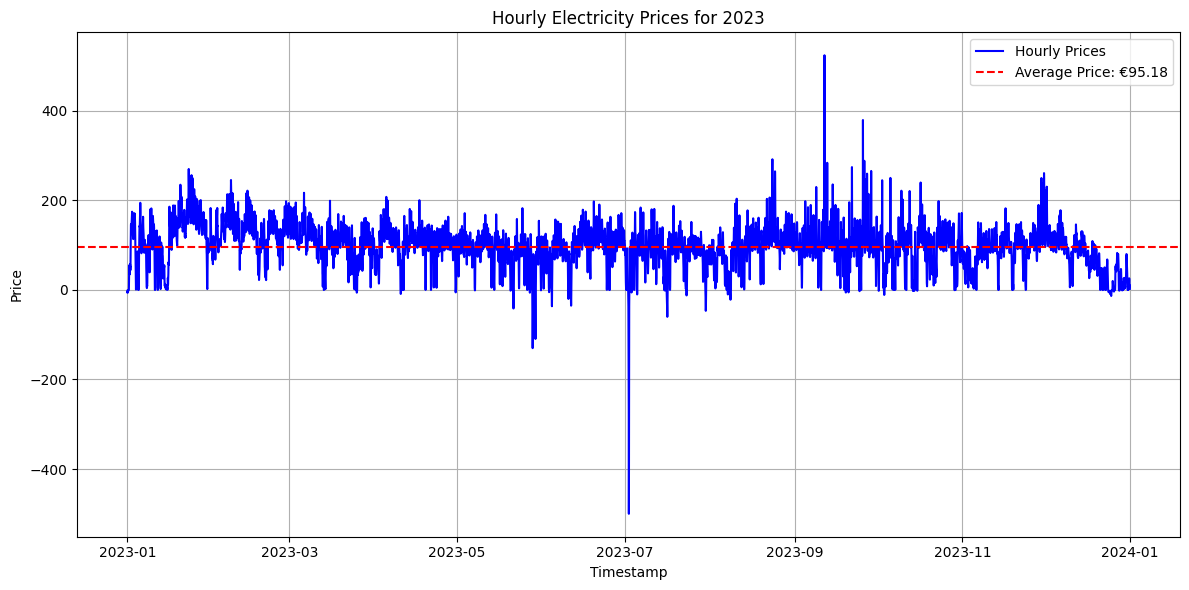

In [ ]:
data_2023 = df[df['year'] == 2023]

# Step 2: Calculate average price for 2019
average_price_2023 = data_2023['Price'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot hourly electricity prices for 2019
plt.plot(data_2023['Date-Time'], data_2023['Price'], color='blue', label='Hourly Prices')

# Add a horizontal line for the average price
plt.axhline(y=average_price_2023, color='red', linestyle='--', label=f'Average Price: €{average_price_2023:.2f}')

plt.title('Hourly Electricity Prices for 2023')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#to find out the maximum and minimum prices in each month in each year. So, for each month there is one max price and one min price (not necessarily on the same day)
#and each year has 12 max prices and 12 min prices

#don't run, file is already present

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Date'] = df.index.date
df['Time'] = df.index.time

# Find the index of the maximum and minimum prices for each month in each year
max_indices = df.groupby(['Year', 'Month'])['Price'].idxmax()
min_indices = df.groupby(['Year', 'Month'])['Price'].idxmin()

# Retrieve the corresponding rows using the indices
max_prices = df.loc[max_indices]
min_prices = df.loc[min_indices]

# Display the results
print("Maximum Prices:")
print(max_prices[['Year', 'Month', 'Date', 'Time', 'Price']])
print("\nMinimum Prices:")
print(min_prices[['Year', 'Month','Date', 'Time', 'Price']])

Maximum Prices:
                     Year  Month        Date      Time   Price
Date-Time                                                     
2015-01-20 18:00:00  2015      1  2015-01-20  18:00:00   66.65
2015-02-10 18:00:00  2015      2  2015-02-10  18:00:00   84.94
2015-03-24 19:00:00  2015      3  2015-03-24  19:00:00   98.05
2015-04-09 08:00:00  2015      4  2015-04-09  08:00:00   69.03
2015-05-20 08:00:00  2015      5  2015-05-20  08:00:00   56.11
...                   ...    ...         ...       ...     ...
2023-08-23 20:00:00  2023      8  2023-08-23  20:00:00  291.93
2023-09-11 19:00:00  2023      9  2023-09-11  19:00:00  524.27
2023-10-05 19:00:00  2023     10  2023-10-05  19:00:00  250.28
2023-11-30 17:00:00  2023     11  2023-11-30  17:00:00  261.00
2023-12-01 17:00:00  2023     12  2023-12-01  17:00:00  230.69

[108 rows x 5 columns]

Minimum Prices:
                     Year  Month        Date      Time  Price
Date-Time                                                    


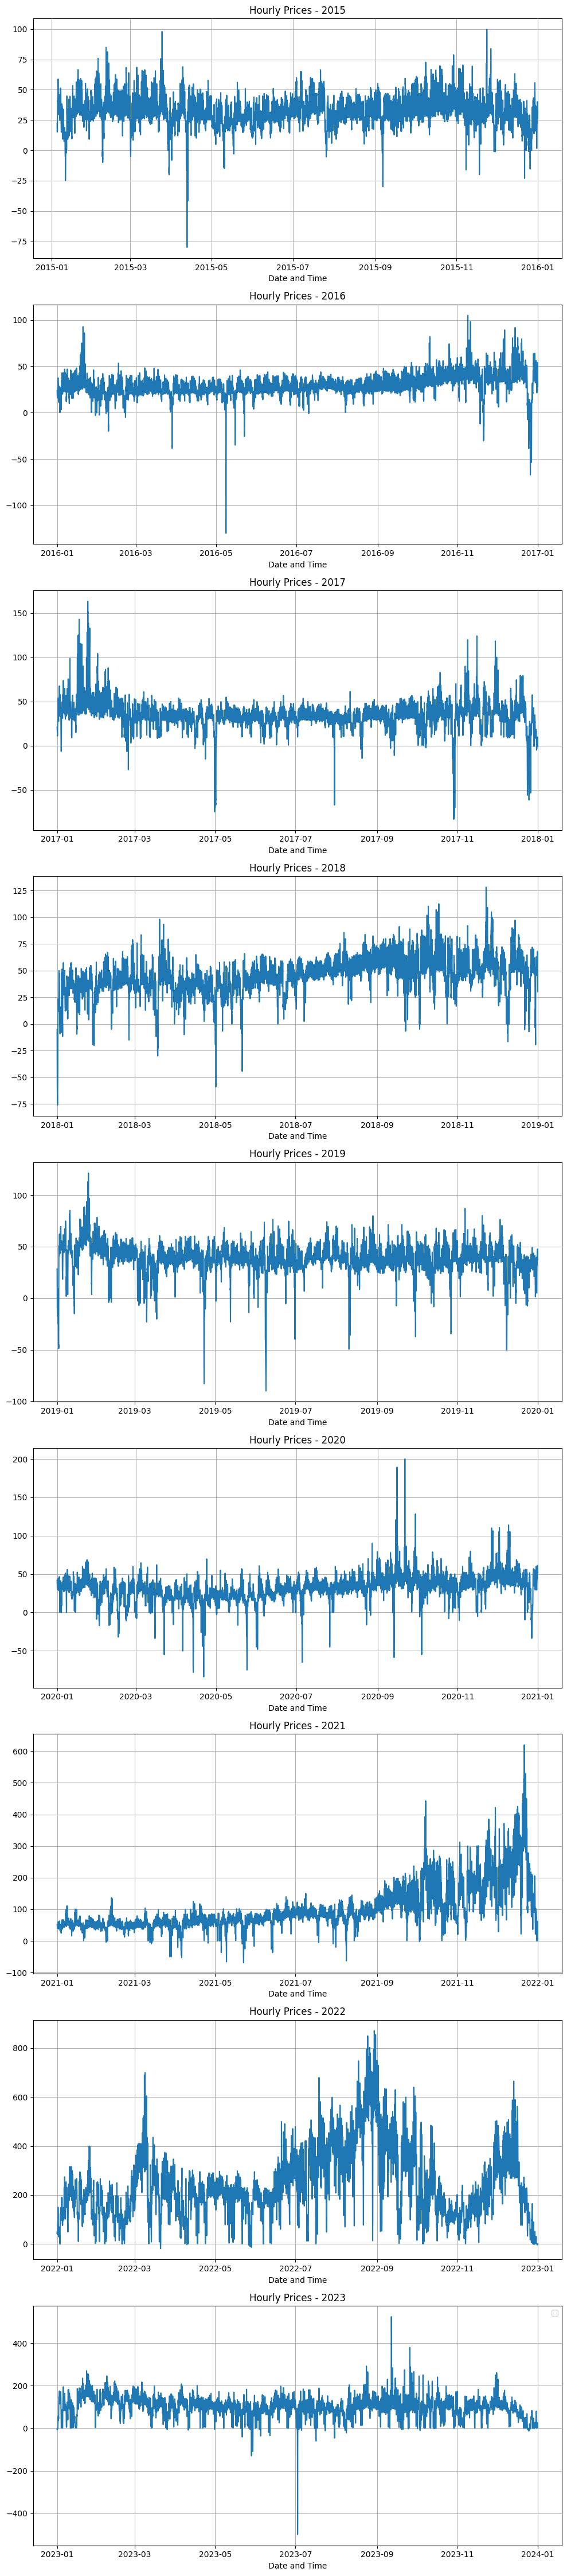

In [ ]:
# Extract the day, hour, year, and month from the datetime index
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Year'] = df.index.year
df['Month'] = df.index.month

# Get the unique years in your dataset
unique_years = df['Year'].unique()

# Create subplots for each year
num_years_to_plot = min(9, len(unique_years))  # Plot at most 9 years
fig, axes = plt.subplots(nrows=num_years_to_plot, figsize=(10, 5 * num_years_to_plot), sharex=False)

# Loop through each year and plot the corresponding data
for i, target_year in enumerate(unique_years[:num_years_to_plot]):
    ax = axes[i]
    year_data = df[df['Year'] == target_year]

    # Plotting the data with day and hour on the x-axis
    ax.grid()
    ax.plot(year_data.index, year_data['Price'])
    ax.set_title(f'Hourly Prices - {target_year}')
    ax.set_xlabel('Date and Time')

    # Customize additional plot settings if needed

    # Display legend in the last subplot
    if i == num_years_to_plot - 1:
        ax.legend()

    # Formatting x-axis ticks to show only days and hours
    #ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Set the maximum number of ticks
    #ax.set_xticklabels(year_data.index.strftime('%d-%H'))  # Format ticks as day-hour

# Customize layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
df.head()

Price  Year  Month
Date-Time                              
2015-01-05 00:00:00  22.34  2015      1
2015-01-05 01:00:00  17.93  2015      1
2015-01-05 02:00:00  15.17  2015      1
2015-01-05 03:00:00  16.38  2015      1
2015-01-05 04:00:00  17.38  2015      1

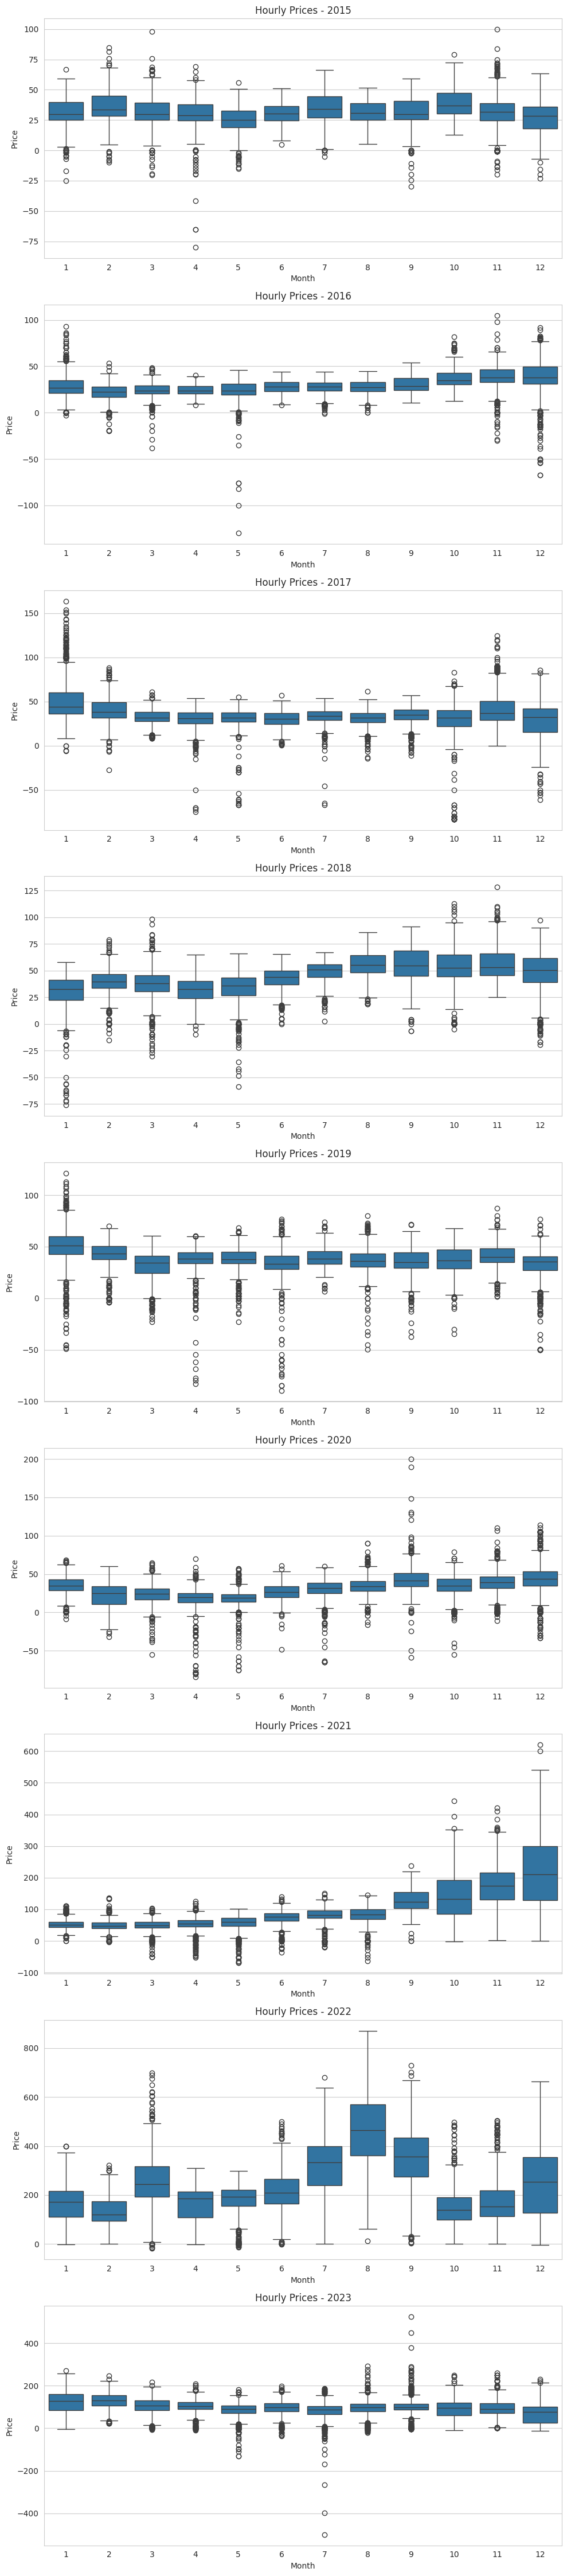

In [ ]:
#make boxplots for monthly data to compare median, etc. ; make different boxplot set for each year
df['Year'] = df.index.year
df['Month'] = df.index.month

unique_years = df['Year'].unique()

num_years_to_plot = min(9, len(unique_years))  # Plot at most 9 years
fig, axes = plt.subplots(nrows=num_years_to_plot, figsize=(10, 5 * num_years_to_plot), sharex=False)

sns.set_style("whitegrid")

for i, target_year in enumerate(unique_years[:num_years_to_plot]):
  ax = axes[i]
  year_data = df[df['Year'] ==  target_year]

  sns.boxplot(x = 'Month', y = 'Price', data=year_data, ax=ax)
  ax.set_title(f'Hourly Prices - {target_year}')

plt.tight_layout()
plt.show()

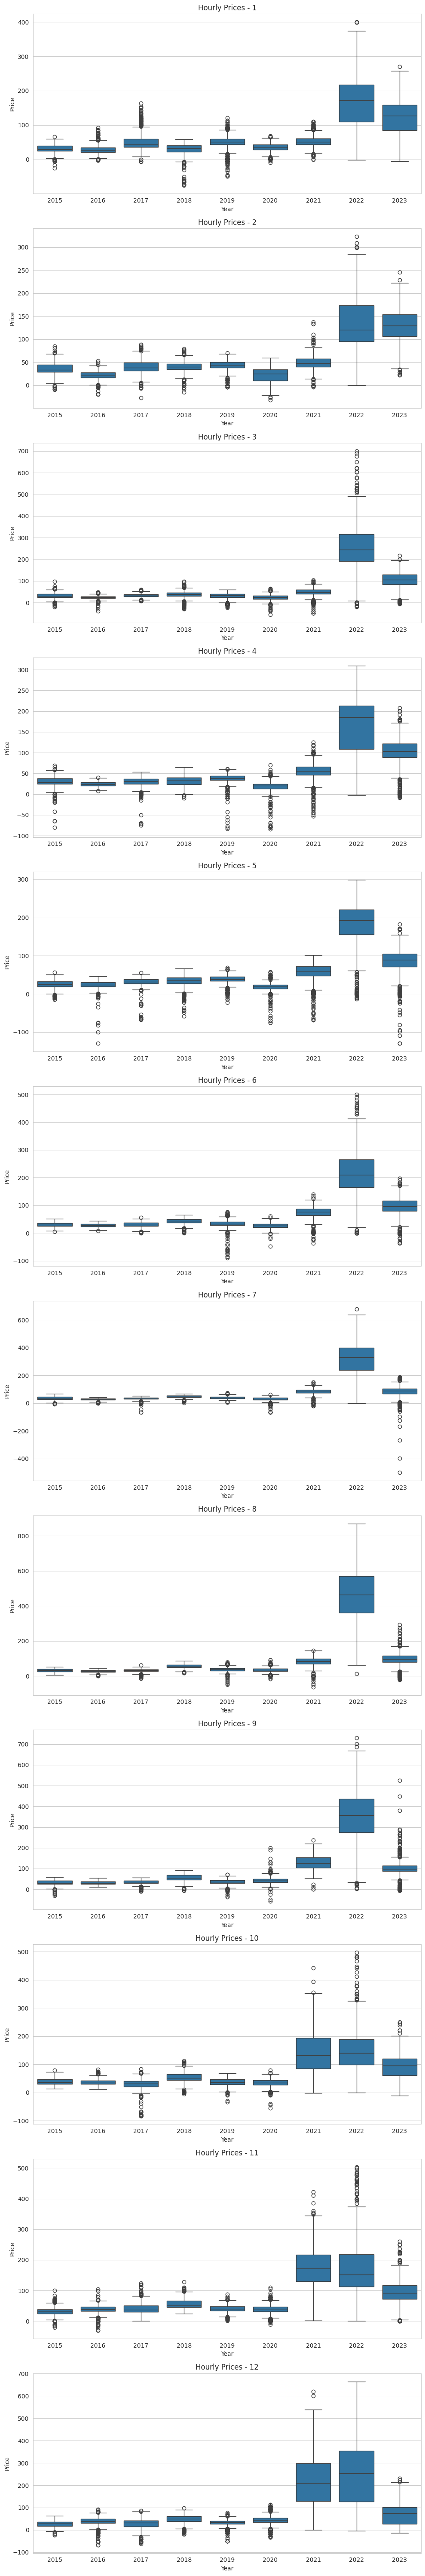

In [ ]:
#make different boxplot to compare each month to the same month in different years

df['Year'] = df.index.year
df['Month'] = df.index.month

unique_month = df['Month'].unique()

num_month_to_plot = min(12, len(unique_month))  # Plot at most 9 years
fig, axes = plt.subplots(nrows=num_month_to_plot, figsize=(10, 5 * num_month_to_plot), sharex=False)

sns.set_style("whitegrid")

for i, target_month in enumerate(unique_month[:num_month_to_plot]):
  ax = axes[i]
  year_data = df[df['Month'] ==  target_month]

  sns.boxplot(x = 'Year', y = 'Price', data=year_data, ax=ax)
  ax.set_title(f'Hourly Prices - {target_month}')

plt.tight_layout()
plt.show()

In [ ]:
#max and min prices each year
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Date'] = df.index.date
df['Time'] = df.index.time

# Find the index of the maximum and minimum prices for each month in each year
max_indices = df.groupby(['Year'])['Price'].idxmax()
min_indices = df.groupby(['Year'])['Price'].idxmin()

# Retrieve the corresponding rows using the indices
max_prices = df.loc[max_indices]
min_prices = df.loc[min_indices]

# Display the results
print("Maximum Prices:")
print(max_prices[['Year', 'Month', 'Date', 'Time', 'Price']])
print("\nMinimum Prices:")
print(min_prices[['Year', 'Month','Date', 'Time', 'Price']])

Maximum Prices:
                     Year  Month        Date      Time   Price
Date-Time                                                     
2015-11-23 17:00:00  2015     11  2015-11-23  17:00:00   99.77
2016-11-08 17:00:00  2016     11  2016-11-08  17:00:00  104.96
2017-01-24 07:00:00  2017      1  2017-01-24  07:00:00  163.52
2018-11-22 17:00:00  2018     11  2018-11-22  17:00:00  128.26
2019-01-24 18:00:00  2019      1  2019-01-24  18:00:00  121.46
2020-09-21 19:00:00  2020      9  2020-09-21  19:00:00  200.04
2021-12-21 17:00:00  2021     12  2021-12-21  17:00:00  620.00
2022-08-29 19:00:00  2022      8  2022-08-29  19:00:00  871.00
2023-09-11 19:00:00  2023      9  2023-09-11  19:00:00  524.27

Minimum Prices:
                     Year  Month        Date      Time   Price
Date-Time                                                     
2015-04-12 14:00:00  2015      4  2015-04-12  14:00:00  -79.94
2016-05-08 14:00:00  2016      5  2016-05-08  14:00:00 -130.09
2017-10-29 02:00:00  2

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month

# Initialize an empty DataFrame to store the monthly average prices
average_prices_df = pd.DataFrame()

# Loop through each month and calculate the average price
for month in range(1, 13):
    monthly_data = df[df['Month'] == month]
    monthly_average = monthly_data.groupby('Year')['Price'].mean()
    average_prices_df[f'Month_{month}_Average_Price'] = monthly_average

# Display the resulting DataFrame
print(average_prices_df)

      Month_1_Average_Price  Month_2_Average_Price  Month_3_Average_Price  \
Year                                                                        
2015              31.053071              36.716920              31.343149   
2016              29.035524              21.989555              24.305047   
2017              52.372957              39.701607              31.701386   
2018              29.461599              40.115104              37.363472   
2019              49.393374              42.820789              30.626958   
2020              35.034906              21.919009              22.485828   
2021              52.806223              48.704940              47.164832   
2022             167.726573             128.802679             252.006851   
2023             117.829315             128.311845             102.521454   

      Month_4_Average_Price  Month_5_Average_Price  Month_6_Average_Price  \
Year                                                                       

In [ ]:
print(average_prices_df.index)


Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64', name='Year')


In [ ]:
average_prices_df.drop(average_prices_df[average_prices_df.index == 2022].index, inplace=True)


In [ ]:
print(average_prices_df)

      Month_1_Average_Price  Month_2_Average_Price  Month_3_Average_Price  \
Year                                                                        
2015              31.053071              36.716920              31.343149   
2016              29.035524              21.989555              24.305047   
2017              52.372957              39.701607              31.701386   
2018              29.461599              40.115104              37.363472   
2019              49.393374              42.820789              30.626958   
2020              35.034906              21.919009              22.485828   
2021              52.806223              48.704940              47.164832   
2023             117.829315             128.311845             102.521454   

      Month_4_Average_Price  Month_5_Average_Price  Month_6_Average_Price  \
Year                                                                        
2015              29.724375              25.357917              30.064389  

In [ ]:
excel_file_path = '/content/drive/MyDrive/monthly_averages.xlsx'
average_prices_df.to_excel(excel_file_path, index=False)

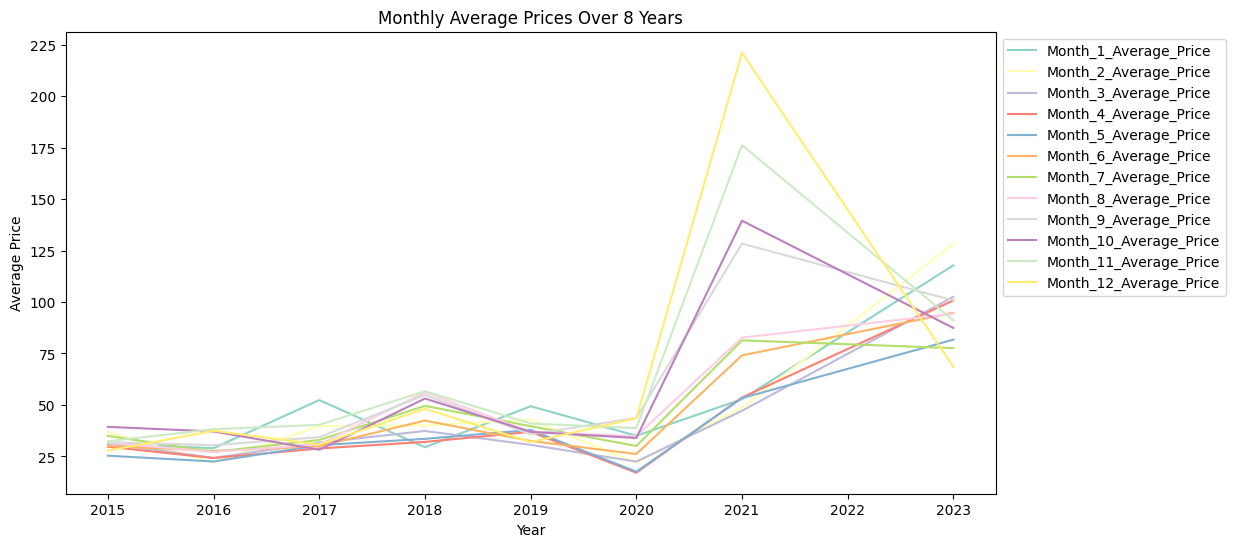

In [ ]:
month_colors = sns.color_palette("Set3", n_colors=13)

plt.figure(figsize=(12, 6))

for i, column in enumerate(average_prices_df.columns):
    plt.plot(average_prices_df.index, average_prices_df[column], label=column, color=month_colors[i])

plt.title('Monthly Average Prices Over 8 Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.show()

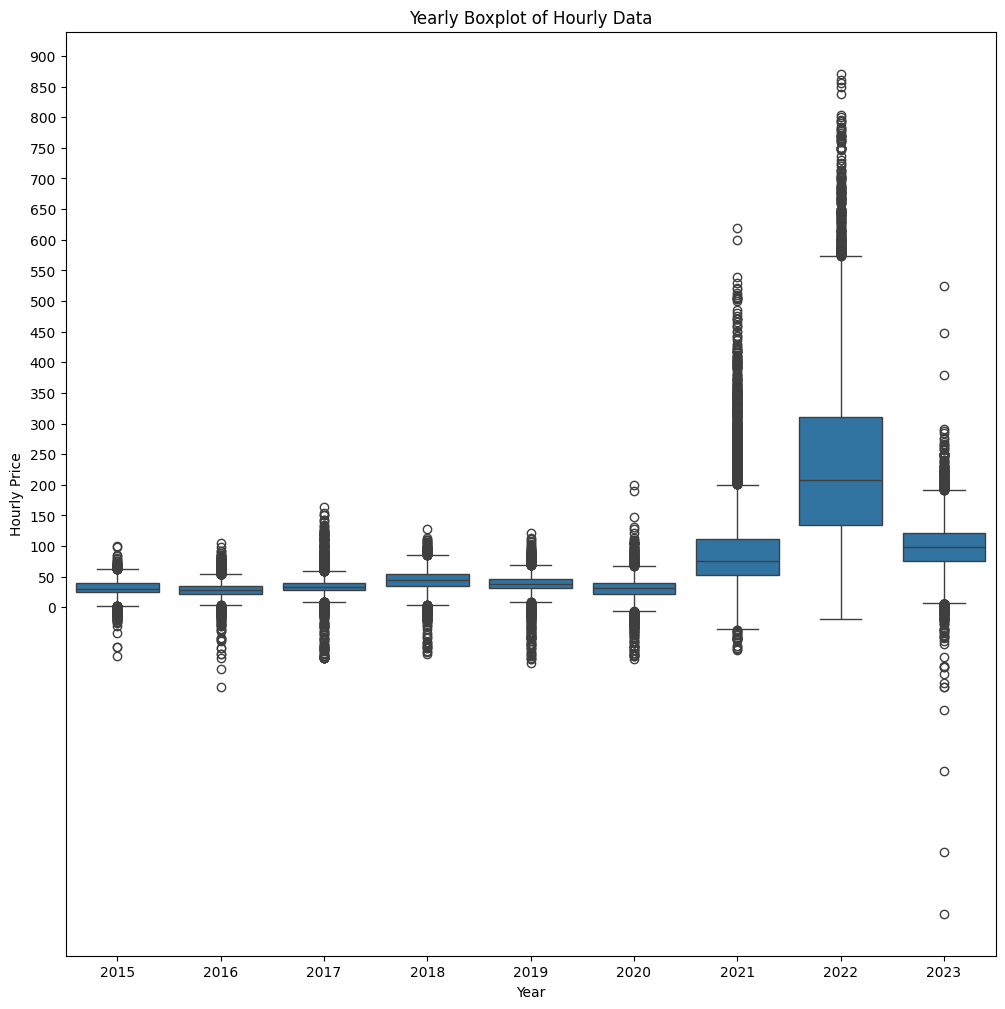

In [ ]:
df['Year'] = df.index.year

# Create a boxplot for the yearly data
plt.figure(figsize=(12, 12))
sns.boxplot(x='Year', y='Price', data=df)
plt.yticks(range(0, int(df['Price'].max()) + 50, 50))

plt.title('Yearly Boxplot of Hourly Data')
plt.xlabel('Year')
plt.ylabel('Hourly Price')
plt.show()

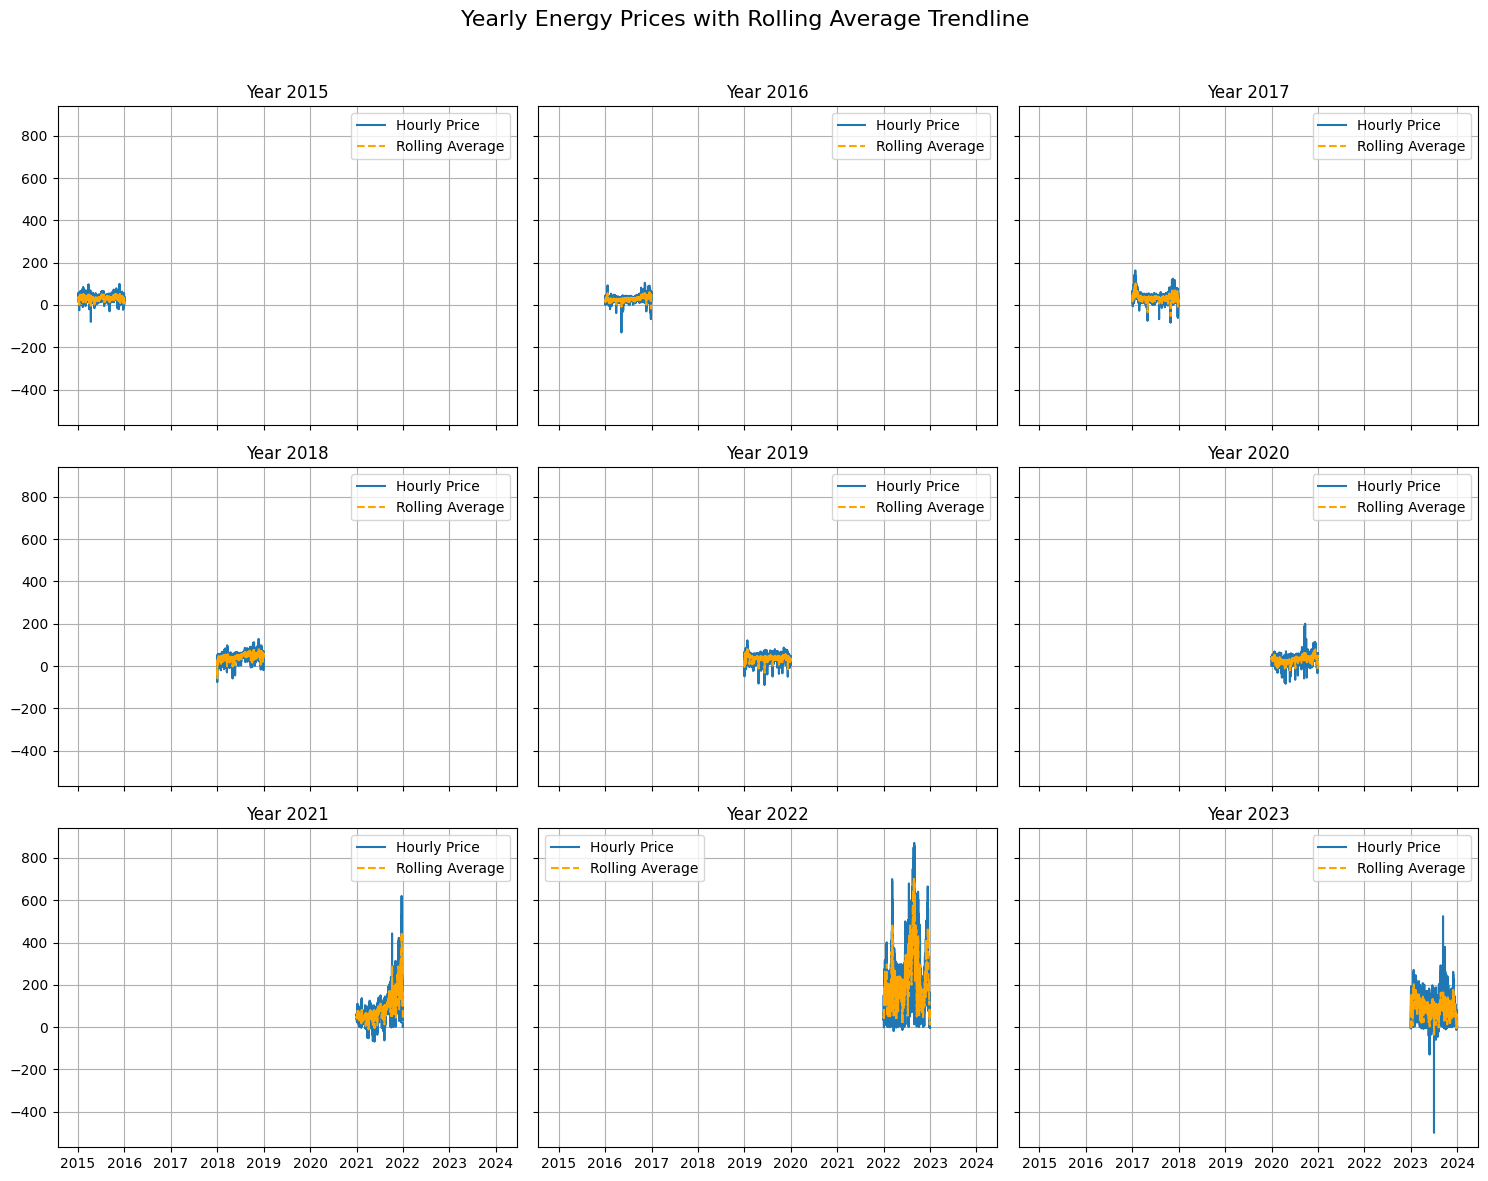

In [ ]:
df['Year'] = df.index.year

# Set up subplots with 3 rows and 3 columns for 9 plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True)
fig.suptitle('Yearly Energy Prices with Rolling Average Trendline', fontsize=16)

# Flatten the 3x3 array of subplots for easy iteration
axes = axes.flatten()

# Loop through each unique year
for i, year in enumerate(df['Year'].unique()):
    # Filter data for the current year
    year_data = df[df['Year'] == year]
    ax = axes[i]

    # Calculate rolling average with a window size (adjust as needed)
    rolling_avg = year_data['Price'].rolling(window=30, min_periods=1).mean()

    # Plot the yearly data and rolling average on the current subplot
    ax.plot(year_data.index, year_data['Price'], label='Hourly Price')
    ax.plot(year_data.index, rolling_avg, label='Rolling Average', linestyle='--', color='orange')

    # Customize the subplot
    axes[i].set_title(f'Year {year}')
    axes[i].grid(True)
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
# Initialize an empty DataFrame to store the monthly average prices
average_prices_df = pd.DataFrame()

# Loop through each month and calculate the average price
for month in range(2015, 2024):
    monthly_data = df[df['Year'] == month]
    monthly_average = monthly_data['Price'].mean()
    print(monthly_average)

# Display the resulting DataFrame

31.834930747922442
28.982496584699454
34.18852739726027
44.4689200913242
37.66660045662101
30.470714936247724
96.84991780821917
235.4461426940639
95.17545205479452


**Correlation matrices**


In [ ]:
all_Data = pd.read_excel('/content/drive/MyDrive/new_data_2015_23.xlsx')

In [ ]:
all_Data.index = pd.to_datetime(all_Data.index, errors='coerce')
all_Data = all_Data.set_index("Date-Time")
#all_Data.head()

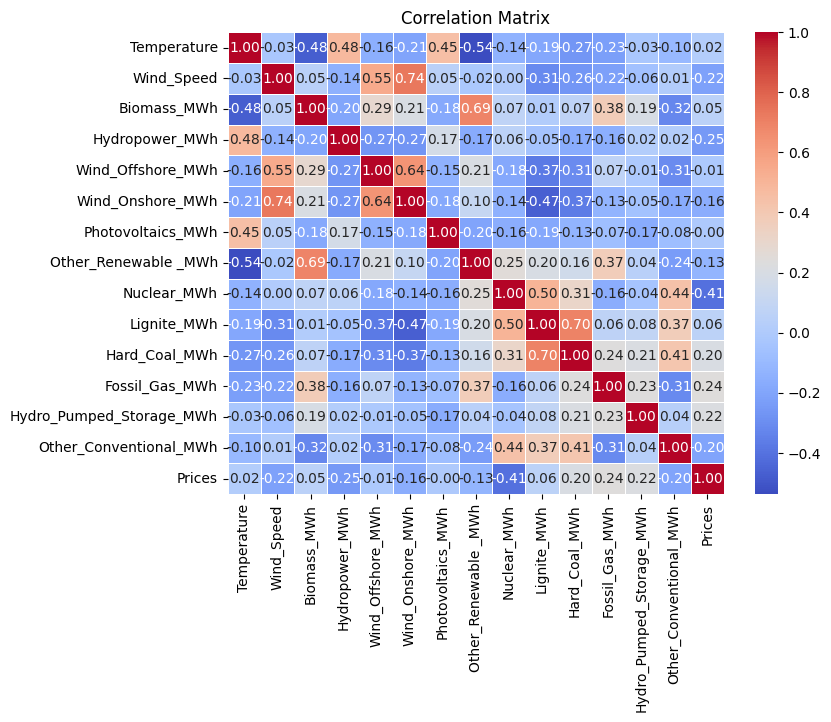

In [ ]:
#for all 9 years
correlation_matrix = all_Data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

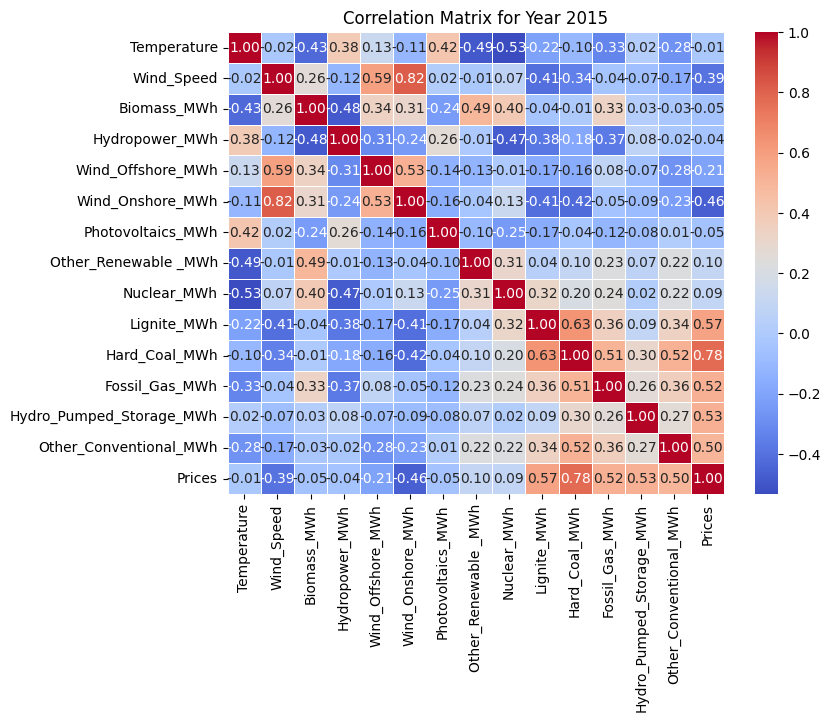

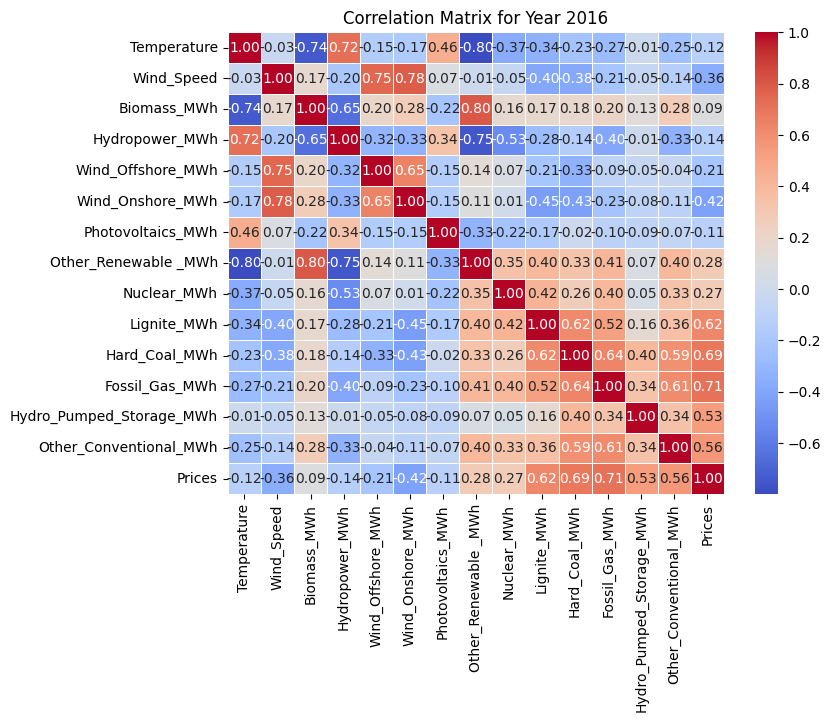

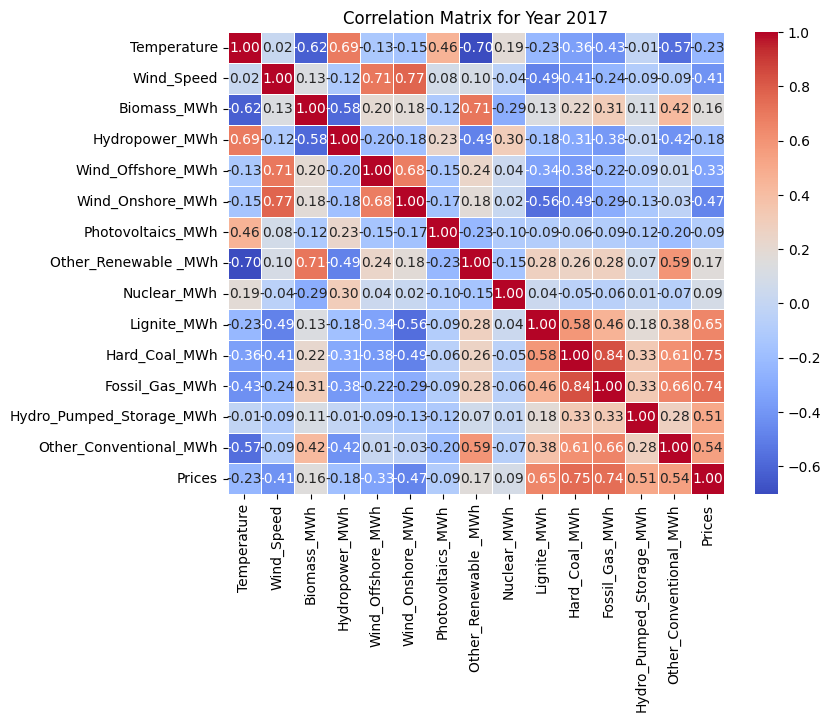

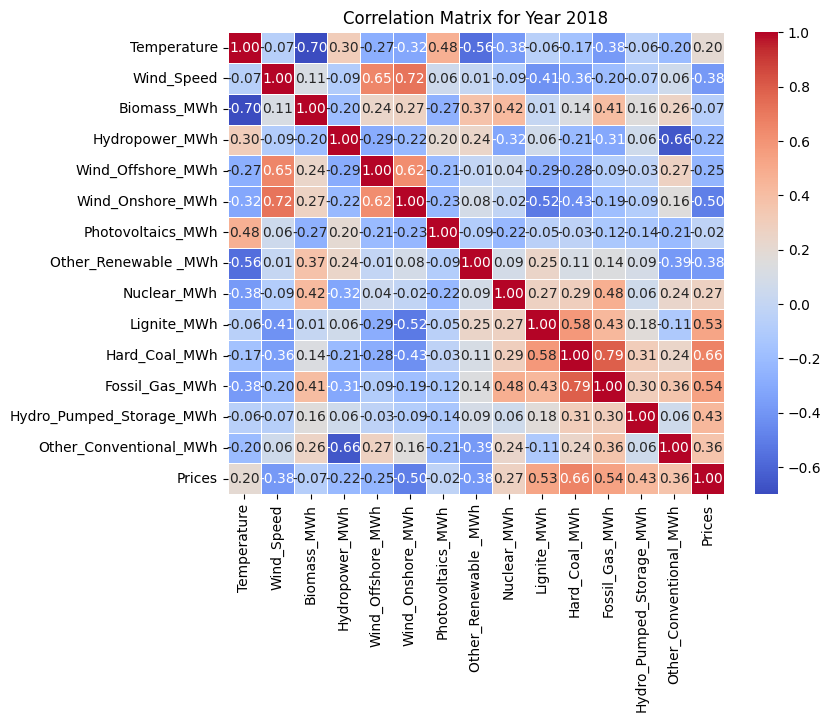

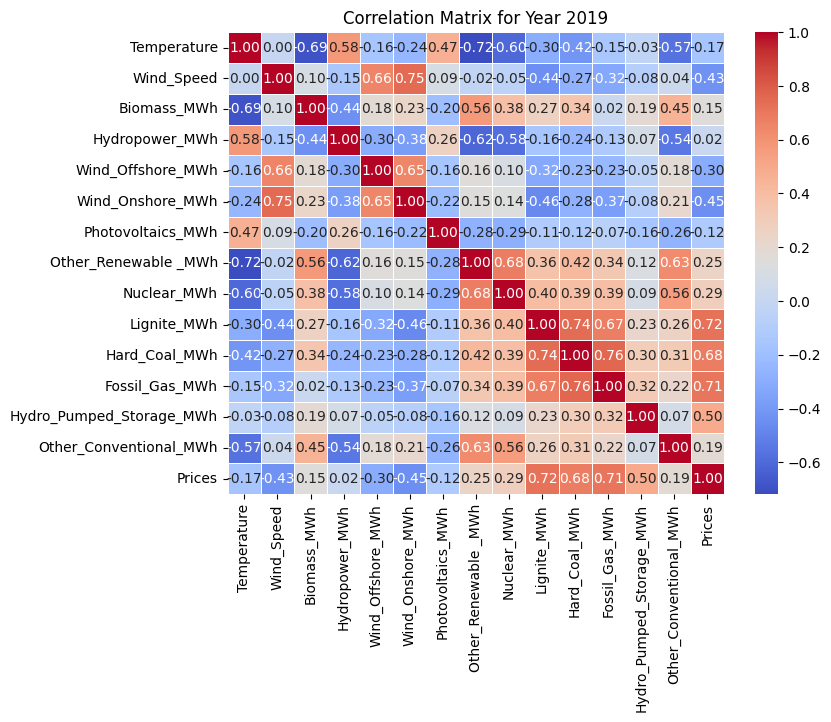

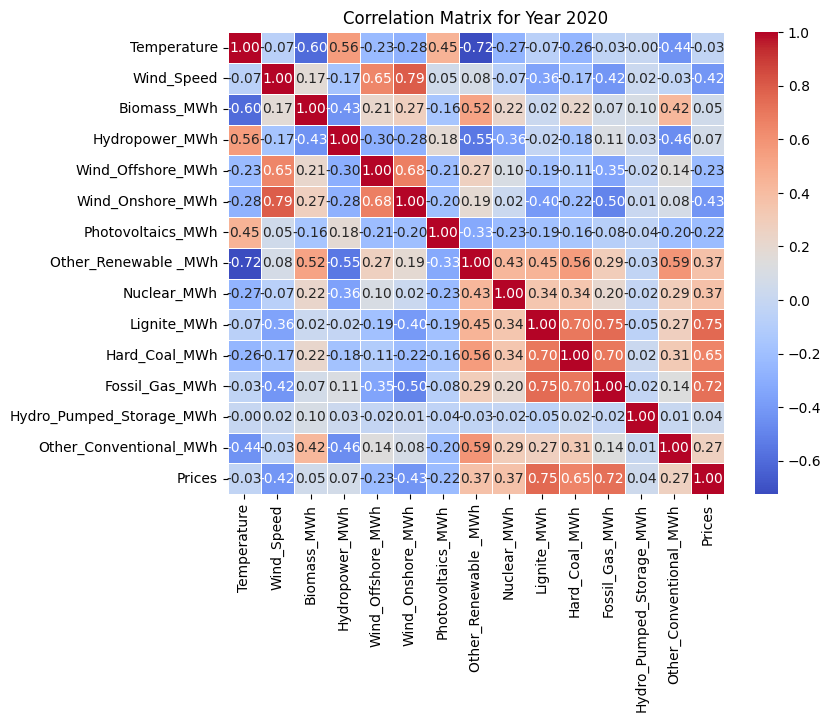

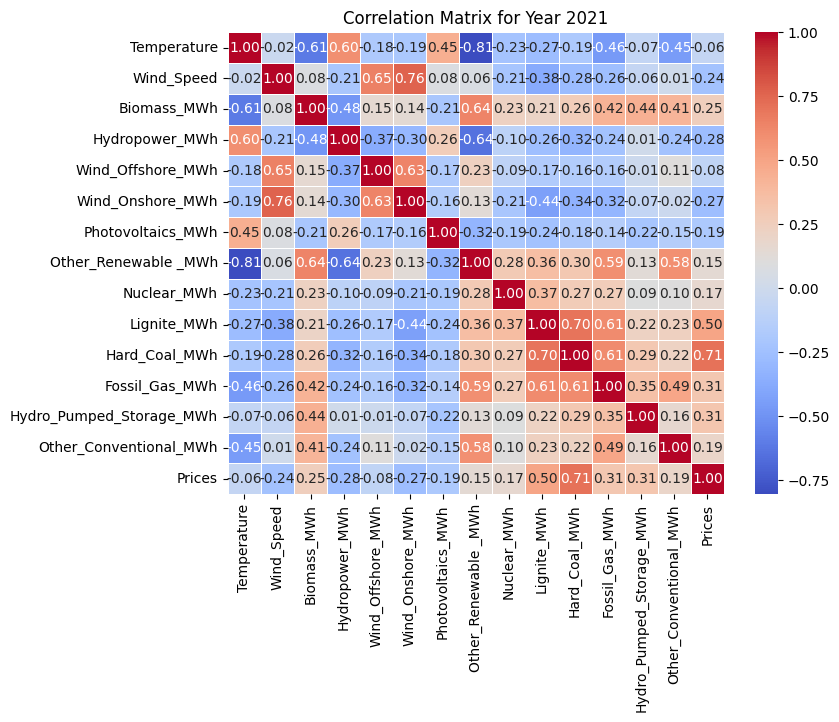

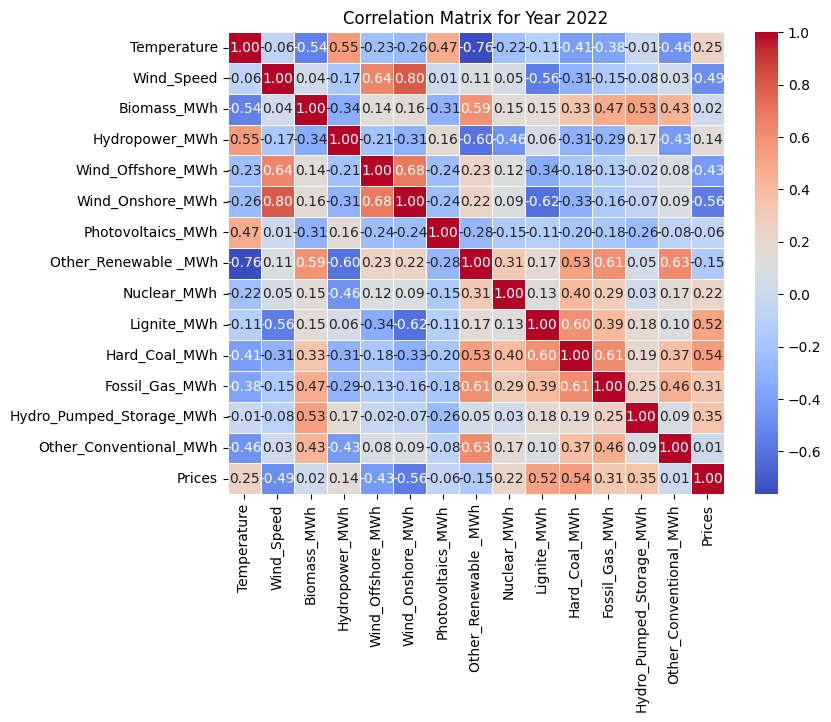

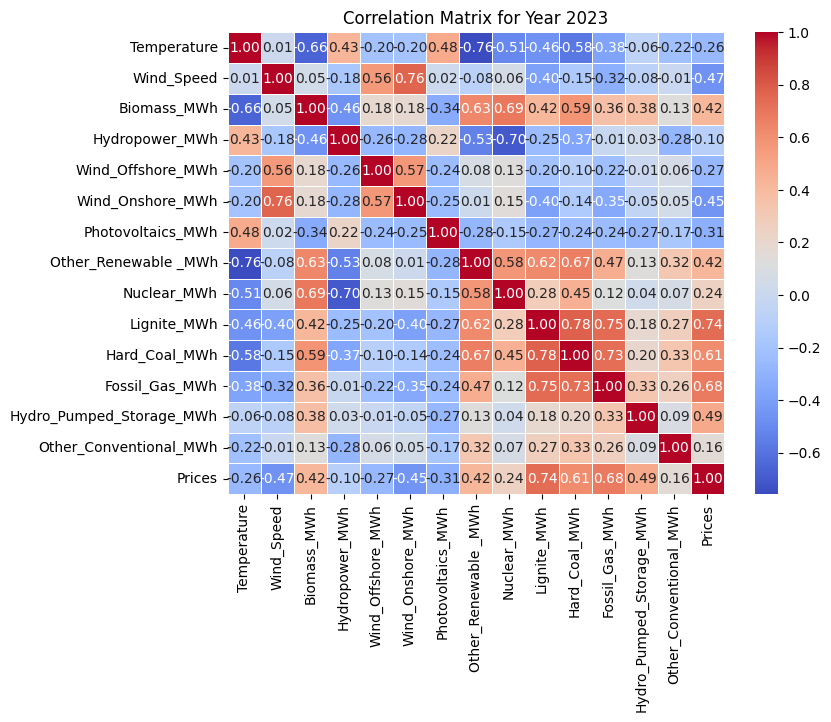

In [ ]:
#for 1 year; 9 matrices

all_Data['Year'] = all_Data.index.year
yearly_correlation_matrices = {}

# Group the data by year
grouped_by_year = all_Data.groupby('Year')

# Iterate over each year
for year, data_for_year in grouped_by_year:
    # Drop the 'Year' column as it's no longer needed for correlation calculation
    data_for_year = data_for_year.drop('Year', axis=1)
    # Calculate correlation matrix for the current year
    correlation_matrix = data_for_year.corr()
    # Store the correlation matrix in the dictionary with the year as the key
    yearly_correlation_matrices[year] = correlation_matrix

# Access each yearly correlation matrix from the dictionary
for year, correlation_matrix in yearly_correlation_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix for Year {year}')
    plt.savefig(f'correlation_matrix_year_{year}.png')  # Save each heatmap as an image file
    plt.show()

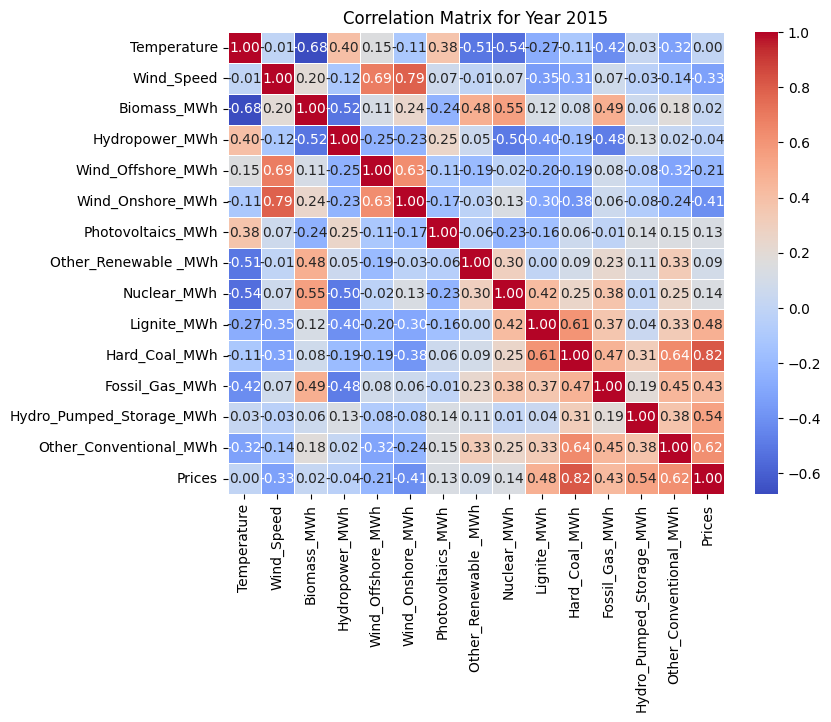

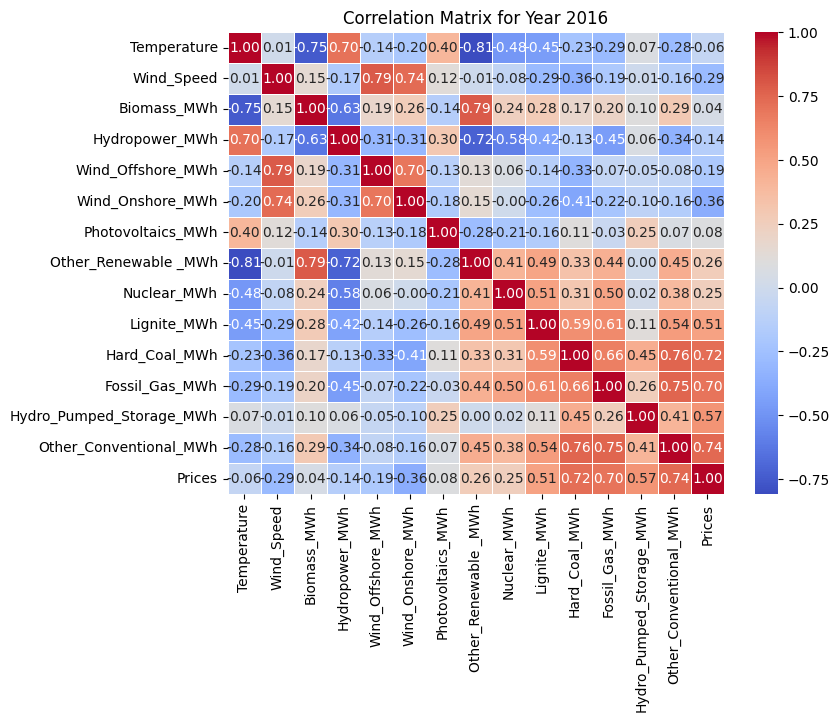

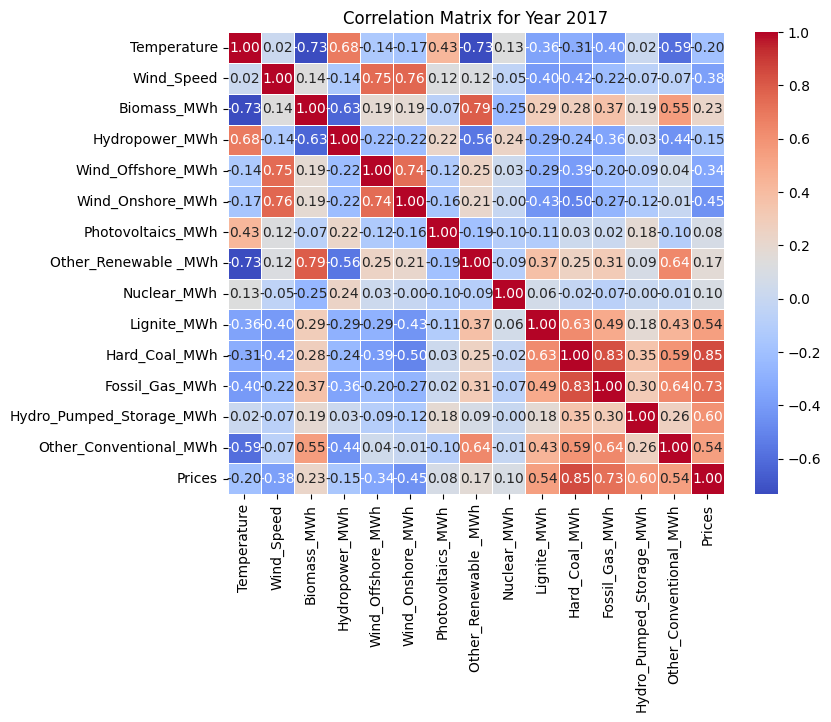

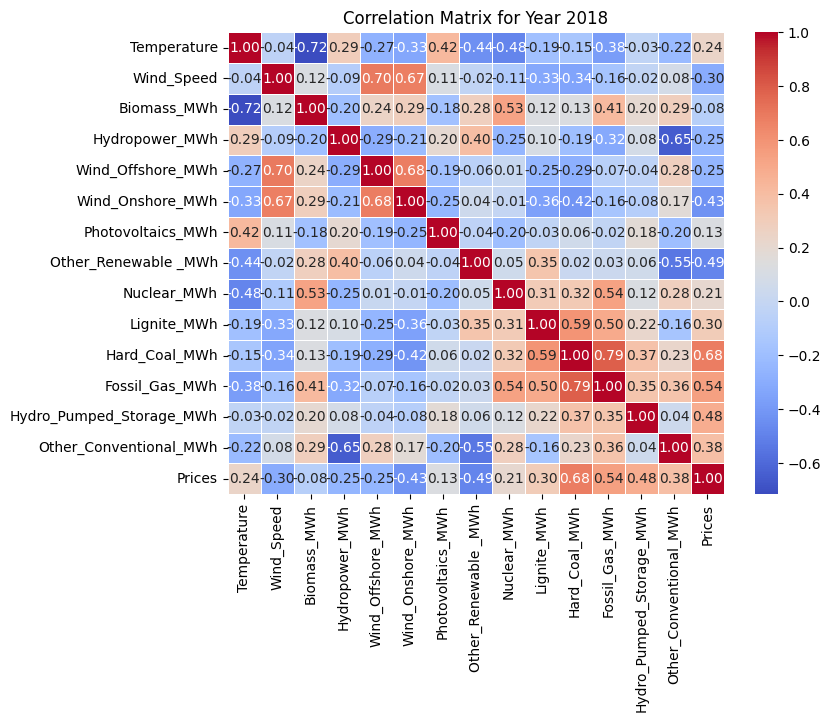

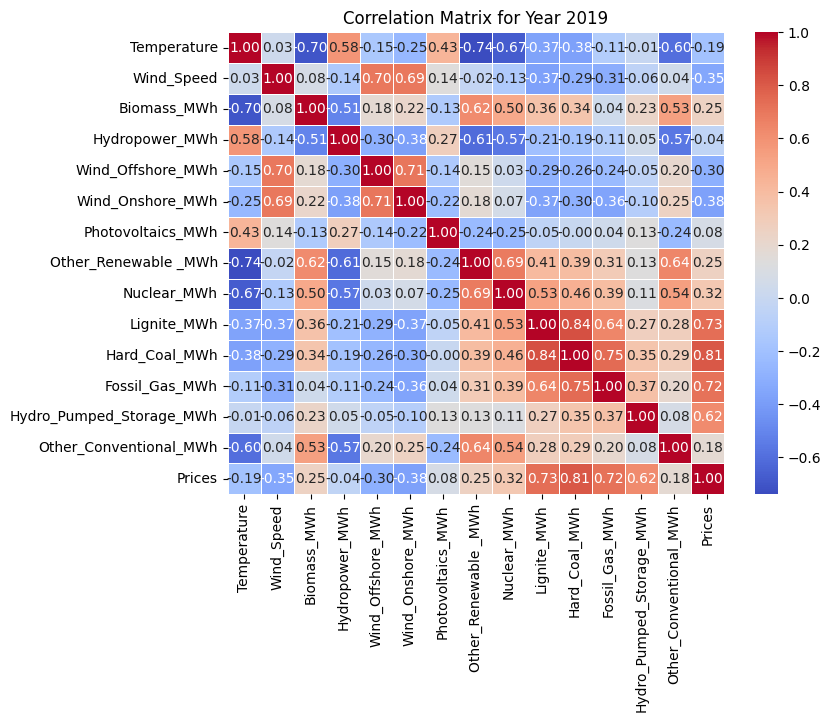

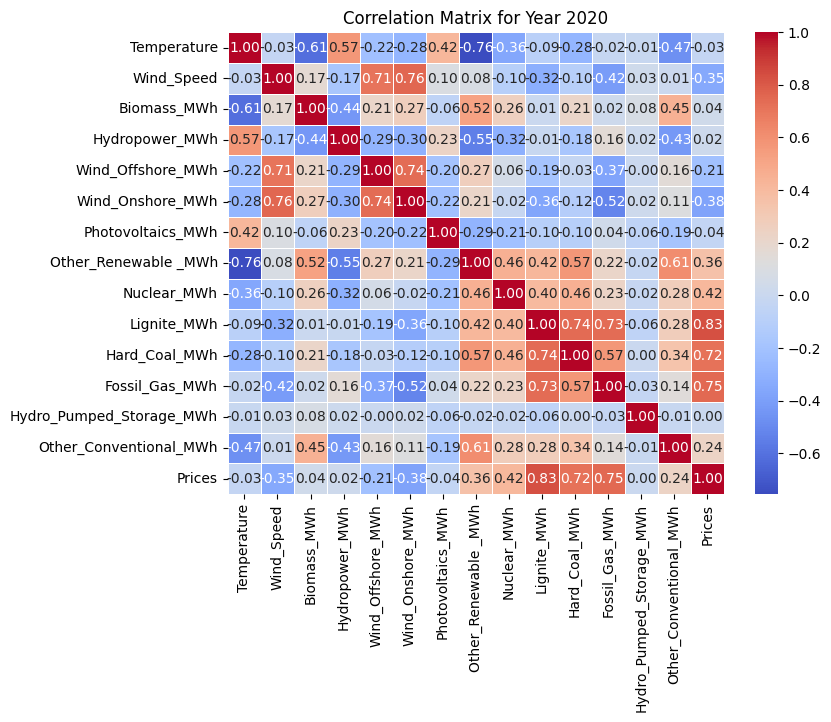

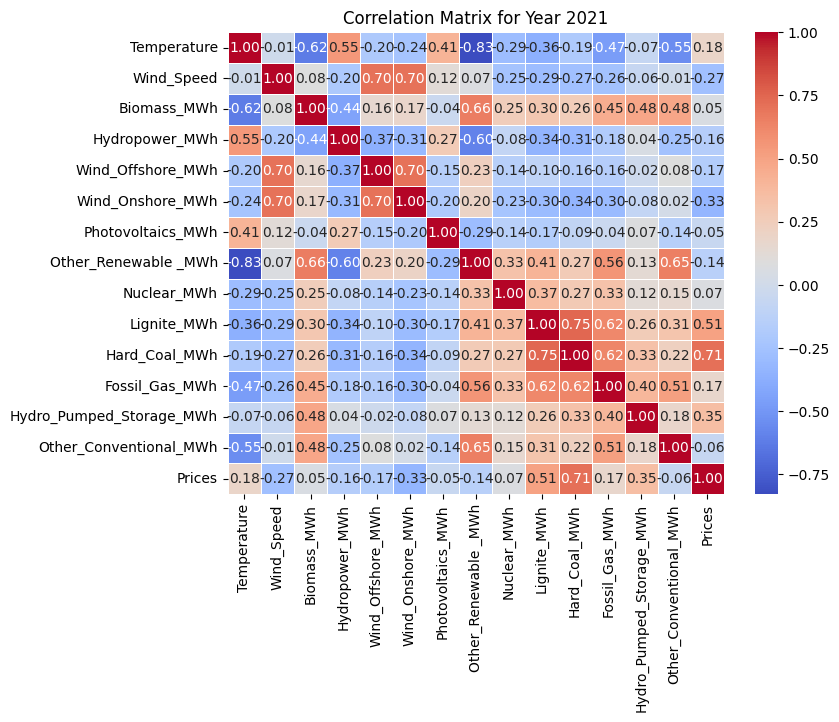

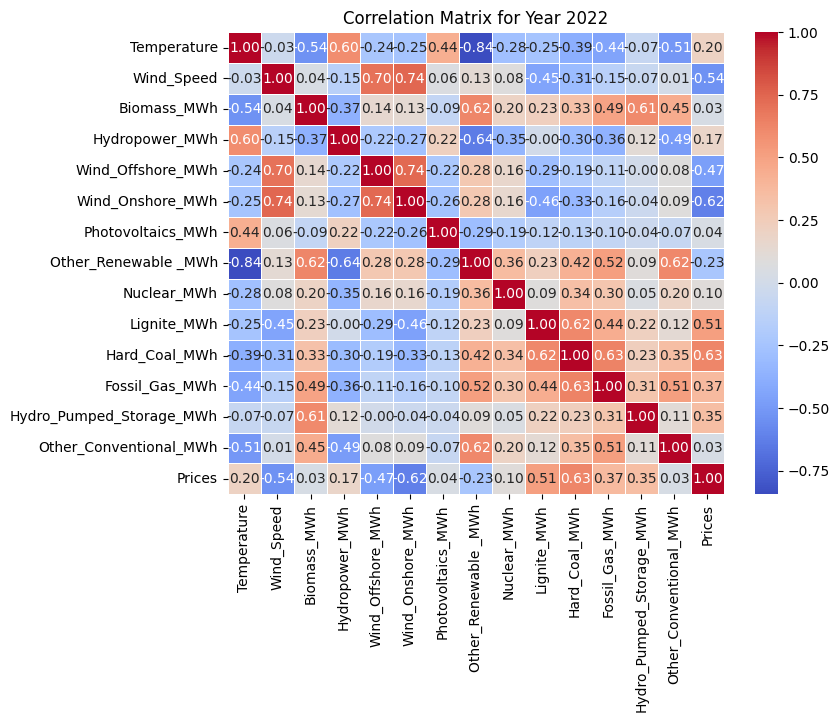

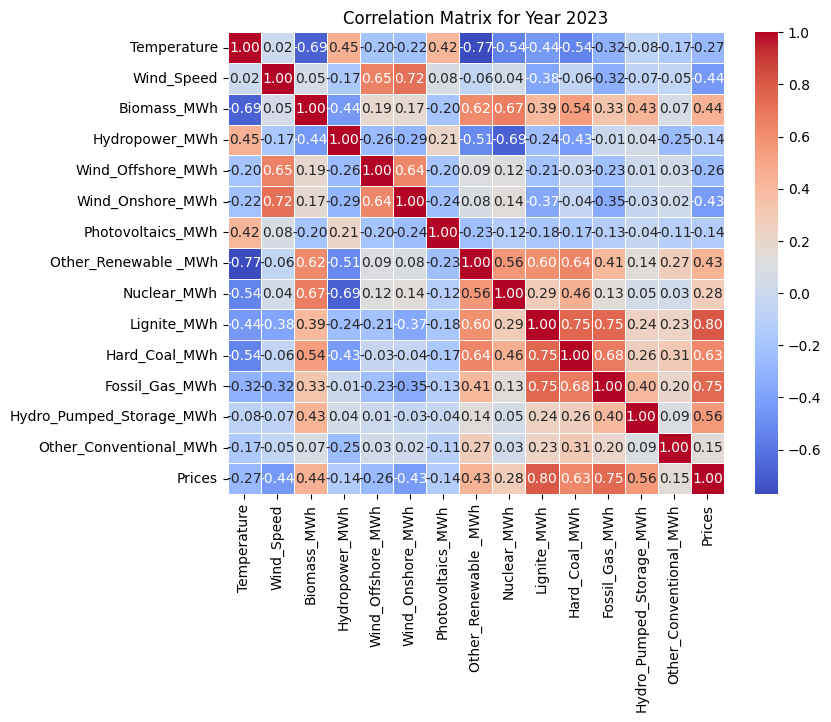

In [ ]:
#for 1 year; 9 matrices; spearman correlation

all_Data['Year'] = all_Data.index.year
yearly_correlation_matrices = {}

# Group the data by year
grouped_by_year = all_Data.groupby('Year')

# Iterate over each year
for year, data_for_year in grouped_by_year:
    # Drop the 'Year' column as it's no longer needed for correlation calculation
    data_for_year = data_for_year.drop('Year', axis=1)
    # Calculate correlation matrix for the current year
    correlation_matrix = data_for_year.corr(method='spearman')
    # Store the correlation matrix in the dictionary with the year as the key
    yearly_correlation_matrices[year] = correlation_matrix

# Access each yearly correlation matrix from the dictionary
for year, correlation_matrix in yearly_correlation_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix for Year {year}')
    plt.savefig(f'correlation_matrix_year_{year}.png')  # Save each heatmap as an image file
    plt.show()


In [ ]:
#obtain the generation data for hours with max and min price

max_prices_df = pd.read_excel("/content/drive/MyDrive/max_min_prices.xlsx", sheet_name = "max_prices")
min_prices_df = pd.read_excel("/content/drive/MyDrive/max_min_prices.xlsx", sheet_name = "min_prices")
prices_df = pd.concat([max_prices_df, min_prices_df], ignore_index = True, axis=0)
generation_df = pd.read_excel("/content/drive/MyDrive/new_data_2015_23.xlsx")

In [ ]:
max_prices_df["Datetime"] = pd.to_datetime(max_prices_df["Date"].astype(str) + " " + max_prices_df["Time"])
max_prices_df["Datetime"] = max_prices_df["Datetime"].values
max_prices_df = max_prices_df.drop(columns = ["Date", "Time", "Month", "Year"])
max_prices_df.set_index('Datetime', inplace=True)
max_prices_df.dropna(axis=1, how='any', inplace=True)

In [ ]:
min_prices_df["Datetime"] = pd.to_datetime(min_prices_df["Date"].astype(str) + " " + min_prices_df["Time"])
min_prices_df["Datetime"] = min_prices_df["Datetime"].values
min_prices_df = min_prices_df.drop(columns = ["Date", "Time", "Month", "Year"])
min_prices_df.set_index('Datetime', inplace=True)
min_prices_df.dropna(axis=1, how='any', inplace=True)

In [ ]:
prices_df["Datetime"] = pd.to_datetime(prices_df["Date"].astype(str) + " " + prices_df['Time'].astype(str))
prices_df["Datetime"] = prices_df["Datetime"].values
prices_df = prices_df.drop(columns = ["Date", "Time", "Month", "Year"])
prices_df.set_index('Datetime', inplace=True)
prices_df.dropna(axis=1, how='any', inplace=True)

In [ ]:
generation_df['Date-Time'] = pd.to_datetime(generation_df['Date-Time'])
generation_df.set_index('Date-Time', inplace=True)
generation_df.head()

Temperature  Wind_Speed  Biomass_MWh  Hydropower_MWh  \
Date-Time                                                                   
2015-01-05 00:00:00          5.4        6.28      4064.00         1680.25   
2015-01-05 01:00:00          5.3        6.41      4069.25         1676.50   
2015-01-05 02:00:00          5.3        6.30      4068.50         1661.50   
2015-01-05 03:00:00          5.2        6.36      4067.00         1644.00   
2015-01-05 04:00:00          5.4        6.06      4052.00         1632.00   

                     Wind_Offshore_MWh  Wind_Onshore_MWh  Photovoltaics_MWh  \
Date-Time                                                                     
2015-01-05 00:00:00             473.75          11847.25                0.0   
2015-01-05 01:00:00             464.75          11814.75                0.0   
2015-01-05 02:00:00             461.50          12198.75                0.0   
2015-01-05 03:00:00             450.25          12312.75                0.0   
2015-01-05 04:00:00             453.50          13093.50                0.0   

                     Other_Renewable _MWh  Nuclear_MWh  Lignite_MWh  \
Date-Time                                                             
2015-01-05 00:00:00                132.25     10934.50     16041.75   
2015-01-05 01:00:00                131.00     11055.00     15390.50   
2015-01-05 02:00:00                131.00     10861.00     15407.75   
2015-01-05 03:00:00                131.00     10760.00     15528.75   
2015-01-05 04:00:00                131.00     10632.75     15449.25   

                     Hard_Coal_MWh  Fossil_Gas_MWh  Hydro_Pumped_Storage_MWh  \
Date-Time                                                                      
2015-01-05 00:00:00        2201.50          987.00                   1334.25   
2015-01-05 01:00:00        2163.25          961.25                   1038.25   
2015-01-05 02:00:00        2012.00          983.00                    265.50   
2015-01-05 03:00:00        2049.25          996.75                    274.00   
2015-01-05 04:00:00        2783.50         1044.75                      5.25   

                     Other_Conventional_MWh  Prices  
Date-Time                                            
2015-01-05 00:00:00                 5207.00   22.34  
2015-01-05 01:00:00                 4743.25   17.93  
2015-01-05 02:00:00                 5266.50   15.17  
2015-01-05 03:00:00                 5612.25   16.38  
2015-01-05 04:00:00                 6223.75   17.38

In [ ]:
generation_on_max_hours = generation_df.loc[max_prices_df.index]
generation_on_min_hours = generation_df.loc[min_prices_df.index]

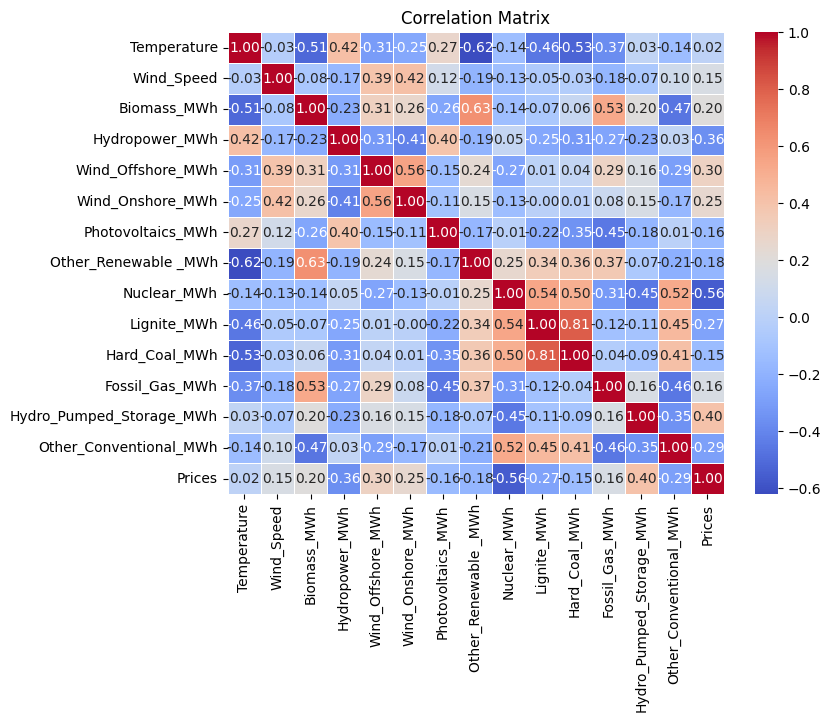

In [ ]:
correlation_matrix = generation_on_max_hours.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

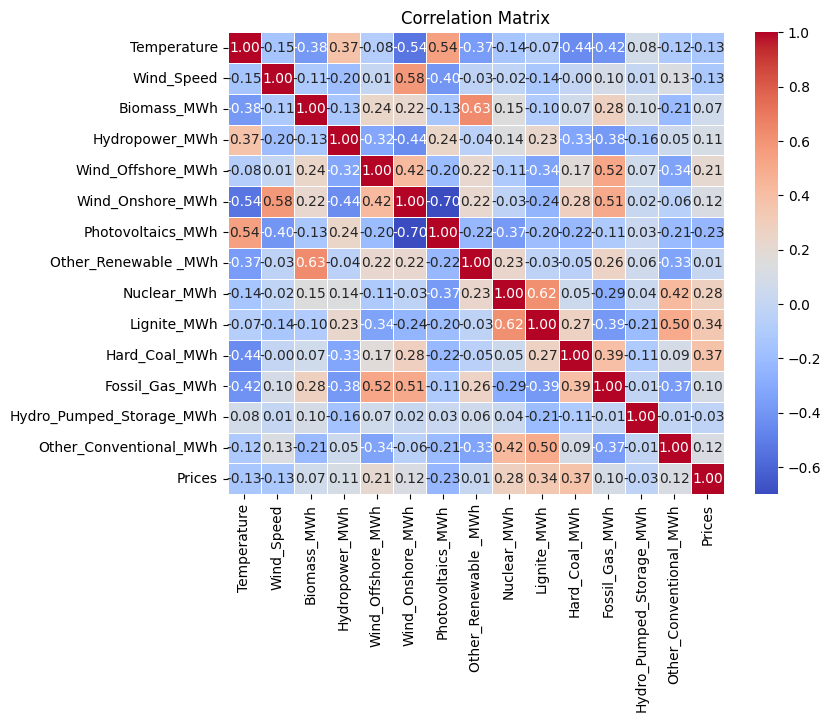

In [ ]:
correlation_matrix = generation_on_min_hours.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()